# Lab 2: Landscape Energy Balance

<img src="./assets/mpala1.jpeg" alt="mpala" width="800"/>

In the last lab, we used mass balance concepts to calculate the water balance within a watershed. In this lab, will will use energy balance concepts to explore the fluxes of energy across a landscape (more specifically, $\uparrow$ this landscape!).


<div class="boxhead3">
    Lab 2 Contents
</div>

<div class="boxtext3">
<ul class="a">
    <li> 1. Surface Energy Balance </li>
    <ul class="b">
        <li> Background </li>
    </ul>
    <li> 2. The Radiation Budget </li>
    <ul class="b">
        <li> Shortwave radiation </li>
        <li> Longwave radiation </li>
        <li> Problems </li>
    </ul>
    <li> 3. Landscape Energy Budget </li>
    <ul class="b">
        <li> Ground heat flux </li>
        <li> Sensible heat flux </li>
        <li> Latent heat flux </li>
        <li> Problems </li>
    </ul>
    <li> 4. Putting it all together </li>
</ul>

</div>


<hr style="border-top: 0.2px solid gray; margin-top: 12pt; margin-bottom: 0pt"></hr>

### Instructions
Work through the exercise, writing code where indicated. For some of the questions, you may want to add a Markdown cell to discuss your answer. To run a cell, click on the cell and press "Shift" + "Enter" or click the "Run" button in the toolbar at the top. Note: Do not restart the kernel and clear all outputs. If this happens, run the last cell in the notebook before proceeding.

<p style="color:#408000; font-weight: bold"> 🐍 &nbsp; &nbsp; This symbol designates an important note about Python structure, syntax, or another quirk.  </p>

<p style="color:#443823; font-weight: bold">📊 &nbsp; &nbsp; This symbol designates an important note about environmental data methods, sources, and access. </p>

<p style="color:#008C96; font-weight: bold"> ▶️ &nbsp; &nbsp; This symbol designates a cell with code to be run.  </p>

<p style="color:#008C96; font-weight: bold"> ✏️ &nbsp; &nbsp; This symbol designates a partially coded cell with an example.  </p>

<p style="color:#008C96; font-weight: bold"> 📚 &nbsp; &nbsp; This symbol designates a practice question.  </p>


<hr style="border-top: 1px solid gray; margin-top: 24px; margin-bottom: 1px"></hr>

# 1. Surface Energy Balance

<hr style="border-top: 0.5px solid gray; margin-top: 10pt; margin-bottom: 12pt"></hr>


Much like mass balance, the energy balance of a system consists of the sum of inputs and outputs. While the mass balance terms can be discretized into obvious components (e.g. precipitation), the components of the Earth's energy budget are **fluxes**, meaning that they consist of both inputs *and* outputs and can be either positive or negative, depending on environmental conditions. These fluxes are driven by four important processes: **radiation**, **conduction**, **convection**, and **evaporation**.

The largest and perhaps most obvious component of the Earth's energy budget is the **net radiation**, $R_n$, consisting of electromagnetic radiation that is *absorbed*, *reflected*, and *emitted* by the Earth's surface. The surplus of incoming solar radiation provides excess energy for transport-driven processes at the Earth's surface. Thermal conduction of heat energy within the ground leads to **ground heat flux**, $G$. **Sensible heat flux**, $H$, refers to the turbulent transfer of energy between the surface and the atmosphere via convective processes. **Latent heat flux**, $\lambda E$, represents the loss of energy associated with phase changes between liquid water and water vapor through evaporation, transpiration, and condensation.


\begin{equation}
\tag{1.1}
    \frac{dQ}{dt} \ = \ R_n \ - \ H \ - \ \lambda E \ - \ G
\end{equation}

These energy fluxes (also referred to as *energy flux densities*) quantify the rate of energy transfer per unit area and are measured in units of J m<sup>-2</sup> s<sup>-1</sup> or W m<sup>-2</sup>.

Assuming the system is in *steady state*, a valid assumption over sufficiently long time scales, $ \frac{dQ}{dt} \ = \ 0$, so we can rearrange Equation 1.1 as:

\begin{equation}
\tag{1.2}
    R_n \ = \ H \ + \ \lambda E \ + \ G
\end{equation}

### Measuring environmental fluxes

In this lab, we will be using data collected from a micrometerological tower that uses [eddy covariance](https://en.wikipedia.org/wiki/Eddy_covariance) techniques to measure turbulent fluxes in the atmospheric boundary layer. The physics of this method are too complex to get into here, but eddy covariance is one of the main ways of determining landscape energy balance. These "flux towers" are equipped with sensors to measure wind speed and direction and gas (usually H<sub>2</sub>O and CO<sub>2</sub>) concentrations, and radiation (and usually numerous other sensors!) at very high frequencies (commonly 10 Hz or 10 times per second). These data are then used to calculate fluxes of gas, energy, and momentum across the landscape. 

This short video provides a basic overview of eddy covariance, focusing on CO<sub>2</sub> fluxes. While we won't be working with carbon fluxes in this lab, you can replace "CO<sub>2</sub>" with "H<sub>2</sub>O" to think about water vapor fluxes due to sensible and latent heat.

[<img src="./assets/ec_video.png" alt="ec_video" width="600"/>](https://youtu.be/CR4Anc8Mkas)

### Background

The data we'll work with in this lab come from a flux tower in central Kenya just a few kilometers north of the Equator. Like much of East Africa, the flux tower site is situated in a dryland savanna environment. As we saw in Exercise 3, there are two "rainy" seasons in this part of Kenya, one beginning in March and another in October. 

<img src="./assets/mpalatower.jpeg" alt="tower" width="400"/>

In this lab, we'll look at the last five months of the year, August through December, encompassing the second wet season and compare this season between two years, 2016 and 2019. 

As always, we'll start by importing the necessary libraries.

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [2]:
# Imports
import os
import datetime
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In this lab, you will use data collected from the flux tower in Kenya to calculate the overall energy balance for this landscape, comparing eddy flux calculations to radiation data. The data are located in the [data](../data) folder of the GitHub repository. The raw eddy covariance data have already been significantly pruned and pre-processed to allow for efficient calculations of turbulent fluxes in half-hourly averages. The data you will need for these calculations are located in a file called [CR3000_SN4709_flux_ed.csv](../data/lab_2/CR3000_SN4709_flux_ed.csv). These data include:

| Column name    | Units        | Symbol | Description |
| :------------- | :---- | :----- | :---------- |
| **P_a**        | $\text{kPa}$ | $P_a$ | Air pressure |
| **e**          | $\text{kPa}$       | $e$   | Vapor pressure |
| **T_a**        | $^{\circ}\text{C}$ | $T_a$ | Air temperature |
| **cov_Ts_Uz**  | $\text{K m s}^{-1}$ | $\overline{w'T'}$ | Eddy covariance term for SHF |
| **cov_h2o_Uz** | $\text{g m}^{-2} \text{ s}^{-1}$ | $\overline{w'c'_{_{\text{H}_2\text{O}}}}$ | Eddy covariance term for LHF |

<br></br>

The other file, [CR5000_SN2446_upper_ed.csv](../data/lab_2/CR5000_SN2446_upper_ed.csv), contains data from a net radiometer that you will use to assess your eddy covariance calculations. This file is organized as follows:

| Column name | Units | Symbol | Description |
| :---------- | :---- | :----- | :---------- |
| **DOY** | | | Day of year |
| **SW_in**  | $\text{W m}^{-2}$ | $R^{\downarrow}_{_{SW}}$ | Incoming shortwave radiation |
| **SW_out** | $\text{W m}^{-2}$ | $R^{\uparrow}_{_{SW}}$ | Outgoing shortwave radiation |
| **LW_in**  | $\text{W m}^{-2}$ | $R^{\downarrow}_{_{LW}}$ | Incoming longwave radiation  |
| **LW_out** | $\text{W m}^{-2}$ | $R^{\uparrow}_{_{LW}}$ | Outgoing longwave radiation  |
| **P_mm**   | $\text{mm}$       | $P$ | Precipitation                |




<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [3]:
# Data import
flux = pd.read_csv('../data/lab_2/CR3000_SN4709_flux_ed.csv', index_col=0, parse_dates=True)
rad = pd.read_csv('../data/lab_2/CR5000_SN2446_upper_ed.csv', index_col=0, parse_dates=True)

Finally, the following table contains values for several potentially useful constants, which have already been coded in the cell below.

<table>
<thead>
  <tr>
    <th style="text-align:left;"> Constant </th>
    <th style="text-align:center;"> Symbol </th>
    <th style="text-align:left; width:158px"> Value </th>
  </tr>
</thead>
<tbody>
  <tr>
    <td style="text-align:left;"> Stefan-Boltzmann constant </td>
    <td style="text-align:center;"> $\sigma$ </td>
    <td> $5.67 \times 10^{-8} \text{ W m}^{-2} \text{ K}^{-4}$ </td>
  </tr>
  <tr>
    <td style="text-align:left;"> Specific heat capacity of air </td>
    <td style="text-align:center;"> $c_p$ </td>
    <td> $1004.67 \text{ J kg}^{-1} \text{ K}^{-1}$ </td>
  </tr>
  <tr>
    <td style="text-align:left;"> Ideal gas constant </td>
    <td style="text-align:center;"> $R$ </td>
    <td> $8.314 \text{ J mol}^{-1} \text{ K}^{-1}$ </td>
  </tr>
  <tr>
    <td style="text-align:left;"> Latent heat of vaporization </td>
    <td style="text-align:center;"> $\lambda_v$ </td>
    <td> $2440 \text{ J g}^{-1}$ </td>
  </tr>
  <tr>
    <td style="text-align:left;"> Molar mass of water </td>
    <td style="text-align:center;"> $M_{_{\text{H}_2\text{O}}}$ </td>
    <td> $18.01528 \text{ g mol}^{-1}$ </td>
  </tr>
  <tr>
    <td style="text-align:left;"> Molar mass of dry air </td>
    <td style="text-align:center;"> $M_{_{\text{air}}}$ </td>
    <td> $28.9647 \text{ g mol}^{-1}$ </td>
  </tr>
</tbody>
</table>


<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [4]:
# Constants
sigma = 5.67e-8  # Stefan-Boltzmann constant, W m-2 K-4
c_p = 1004.67    # heat capacity, J kg-1 K-1
R = 8.314        # Ideal gas constant, J mol-1 K-1
lambda_v = 2440  # Latent heat of vaporization, J g-1
M_h2o = 18.01528 # Molar mass of water, g mol-1
M_air = 28.9647  # Molar mass of dry air, g mol-1
emissivityE = 0.95 #Assume the surface has the same emissivity as the atmosphere, 𝜀𝑠 = 0.95.

# 2. The Radiation Budget ☀️

<hr style="border-top: 0.5px solid gray; margin-top: 10pt; margin-bottom: 12pt"></hr>

The Earth's radiation budget can be broken into *shortwave* and *longwave* components, referring to the wavelength of transmitted light. Each of these components consists of a flux of incoming (or "downwelling") and outgoing (or "upwelling") energy. Thus, we can write the 

\begin{equation}
\tag{2.1}
    R_n \ = \ R^{\downarrow}_{_{SW}} \, - \, R^{\uparrow}_{_{SW}} \, + \, R^{\downarrow}_{_{LW}} \, - \, R^{\uparrow}_{_{LW}}
\end{equation}

where the arrows denote the direction of the radiation. We'll explore each of these components in more detail below.

<img src="./assets/em_spectrum.jpg" alt="spectrum" width="500"/>

## 2.1. Shortwave radiation
The vast majority of energy entering the Earth's atmosphere is **shortwave radiation** from the sun, $R^{\ \downarrow}_{_{SW}}$, and falls in the ultraviolet, visible, and infrared portions of the electromagnetic spectrum. As we saw in Exercise 1.1, the flux density of the sun's energy at the Earth's atmosphere, known as the *solar constant*, is about 1370 W m<sup>-2</sup>. This is the *maximum* value of $R^{\downarrow}_{_{SW}}$, but this quantity can fluctuate based on seasonal and diurnal geometry, attenuation by the atmosphere, and the amount of clouds and aerosols in the atmosphere. Of the solar radiation that *does* pass through the atmosphere, about 30% is reflected by the Earth's surface, leading to **outgoing shortwave radiation, $R^{\uparrow}_{_{SW}}$**. The ratio of reflected to incoming shortwave radiation is known as **albedo**, $\alpha$.

\begin{equation}
\tag{2.2}
    \alpha \ = \ \frac{R^{\uparrow}_{_{SW}}}{R^{\downarrow}_{_{SW}}}
\end{equation}

Because ~30% of incoming solar radiation is reflected on average, the Earth's average global albedo is 0.3. This value varies between 0 and 1, however, based on the surface. Dark objects like asphalt absorb most of the incident radiation causing them to have a very low albedo. In contrast, light objects like freshly fallen snow have an albedo close to 1 as they reflect nearly all incident energy.

Using Equation 2.2, we can write the net shortwave radiation (i.e. the difference between incoming and outgoing shortwave radiation) as

\begin{equation}
\tag{2.3}
    R^{\downarrow}_{_{SW}} \ - \ R^{\uparrow}_{_{SW}} \ = \ (1 \ - \ \alpha) R^{\downarrow}_{_{SW}}
\end{equation}

## 2.2. Longwave radiation

Some incoming solar radiation is absorbed by larger particles in the Earth's atmosphere, causing the atmosphere to warm. The heat generated by this absorption is emitted in the far infrared portion of the elecromagnetic spectrum, some of which radiates to the surface to produce **incoming longwave radiation, $R^{\downarrow}_{_{LW}}$**. The value of $R^{\downarrow}_{_{LW}}$ varies depending on the temperature profile of the atmosphere and the amount of water vapor and other particles present. As the surface of the Earth heats up, thermal energy is re-emitted as **outgoing longwave radiation, $R^{\uparrow}_{_{LW}}$**. This quantity depends on the temperature and **emissivity** of the surface, $\varepsilon$. Both incoming and outgoing longwave radiation can be calculated from the Stefan-Boltzmann law, which describes the energy emitted from an object in terms of its temperature:

\begin{equation}
\tag{2.4}
    j^* \ = \ \varepsilon \sigma T^{4}
\end{equation}

where $\sigma$ is the **Stefan-Boltzman constant** with a value of $5.67 \times 10^{-8} \text{ W m}^{-2} \text{ K}^{-4}$. 

Thus, we can rewrite Equation 2.1 to express net radiation in terms of these relationships in Equations 2.3 and 2.4:

\begin{equation}
\tag{2.5}
    R^{}_{n} \ = \ (1-\alpha) \ R^{\downarrow}_{_{SW}} \ + \ \varepsilon_a \sigma {T^{}_{a}}^{4} \ - \ \varepsilon_s \sigma {T^{}_{s}}^{4}
\end{equation}

where $\varepsilon_a$ and $\varepsilon_s$ are the emissivities and $T_a$ and $T_s$ are the temperatures (in Kelvin) of the air and the surface, respectively.

The sum of the incoming shortwave radiation (corrected for albedo) and incoming longwave radiation represents the **total energy available to the system, $Q_{av}$**. We can rewrite Equation 2.5 in terms of available energy:

\begin{equation}
\tag{2.6}
    Q_{av} \ = \ (1-\alpha) \ R^{\downarrow}_{_{SW}} \ + \ \varepsilon_a \sigma {T^{}_{a}}^{4} \ = \ R^{\downarrow}_{_{SW}} \, - \, R^{\uparrow}_{_{SW}} \, + \, R^{\downarrow}_{_{LW}}  \ = \varepsilon_s \sigma {T^{}_{s}}^{4}
\end{equation}


<hr style="border-top: 0.5px solid gray; margin-top: 6pt; margin-bottom: 12pt"></hr>

## Problems

### 2.1. Determine the albedo of the landscape.

<div class="practice">
    📚  <b> Question 2.1. </b> 
    Calculate daily albedo values using the average daily $R^{\downarrow}_{_{SW}}$ and $R^{\uparrow}_{_{SW}}$ values. What is the mean daily albedo of the landscape over the entire dataset?
</div>

In [13]:
#Lab #2:
# calculate daily albedo level
dayrad = rad.groupby(rad.index.date).mean()      # it is okay to put datetime index in argunmets

albedo = dayrad['SW_out'] / dayrad['SW_in']
#type(albedo)
albedo # is a series

2016-08-01    0.124554
2016-08-02    0.129314
2016-08-03    0.134172
2016-08-04    0.142489
2016-08-05    0.128827
                ...   
2019-12-27    0.148546
2019-12-28    0.148212
2019-12-29    0.152447
2019-12-30    0.152557
2019-12-31    0.153873
Length: 306, dtype: float64

### 2.2. Estimate the surface temperature of the earth from $Q_{av}$

<div class="practice">
    📚  <b> Question 2.2. </b> 
    Calculate $Q_{av}$ from $R^{\downarrow}_{_{SW}}$, $R^{\uparrow}_{_{SW}}$, and $R^{\downarrow}_{_{LW}}$. Using the mean value of $Q_{av}$ over the entire dataset, use Equation 2.6 to calculate the apparent surface temperature of the earth, $T_s$, in both $^{\circ}$C and $^{\circ}$F assuming all of the available energy is used to heat the surface. Assume the surface has the same emissivity as the atmosphere, $\varepsilon_s \ = \ 0.95$.
</div>

In [14]:
# calculate Qav from equation: 𝑄𝑎𝑣 = (1−𝛼) 𝑅↓𝑆𝑊 + 𝜀𝑎𝜎𝑇𝑎4 = 𝑅↓𝑆𝑊−𝑅↑𝑆𝑊+𝑅↓𝐿𝑊 =𝜀𝑠𝜎𝑇𝑠4
rad['Qav'] = rad.SW_in - rad.SW_out + rad.LW_in

# take mean of Qav
rad['Qav'].mean()
# Qav = (1-a) - (shortwave incoming)  (𝜀) (𝑎(𝜎)(𝑇)(𝑎)^4



563.3803105441089

### 2.3. Net radiation

Now, calculate the actual net radiation from the dataset.

<div class="practice">
    📚  <b> Question 2.3. </b> 
    Use Equation 2.1 and the actual values of outgoing longwave radiation to calculate net radiation. Plot net radiation from August to December for 2016 and 2019 on the same plot (Hint: use <code>rad.index.dayofyear</code> on the x-axis to display the time series on top of one another). Label your plot appropriately.
</div>

In [15]:
# this one calculates net radiation. 

#LWR_out = pd.Series(rad['LW_out']).mean()
#R_net = (SWR_in - SWR_out) + (LWR_in - LWR_out)
#R_net # I think we need a continous value for this one. 

df_rad = rad['r_net'] = rad.SW_in - rad.SW_out + rad.LW_in - rad.LW_out
rad


,DOY,SW_in,SW_out,LW_in,LW_out,P_mm,Qav,r_net
TIMESTAMP,,,,,,,,
2016-08-01 00:00:00,214,-0.743,1.310,350.4,385.8,0.0,348.347,-37.453
2016-08-01 00:10:00,214,-0.810,1.422,349.9,386.2,0.0,347.668,-38.532
2016-08-01 00:20:00,214,-0.583,1.533,347.4,386.0,0.0,345.284,-40.716
2016-08-01 00:30:00,214,-0.875,1.549,340.4,385.7,0.0,337.976,-47.724
2016-08-01 00:40:00,214,-1.701,1.548,333.3,385.0,0.0,330.051,-54.949
...,...,...,...,...,...,...,...,...
2019-12-31 23:10:00,365,-0.850,1.484,344.6,385.3,0.0,342.266,-43.034
2019-12-31 23:20:00,365,-0.921,1.203,344.6,385.2,0.0,342.476,-42.724
2019-12-31 23:30:00,365,-1.273,1.305,341.5,384.9,0.0,338.922,-45.978


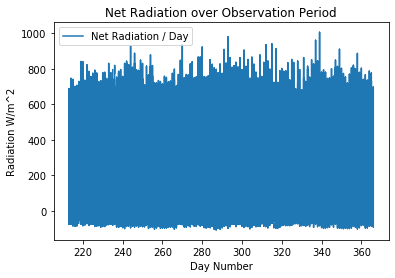

In [6]:
# use matplot lib to plot radiation
fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(rad.index.dayofyear,rad.r_net)

plt.xlabel(r'Day Number')
plt.ylabel(r'Radiation W/m^2')

plt.title('Net Radiation over Observation Period')
plt.legend(labels=['Net Radiation / Day'])
# make sure that the vlaues are plotted fo rthe time series that is specified = filtering

### 2.4. Diurnal radiation

Next, let's look at the diurnal variation in radiation values. Pick a single day of your choosing and plot all four components of radiation, as well as net radiation. You can use a boolean mask on your `DataFrame` to select a single date. For instance, to select the 11th of October 2019:

```python
rad[rad.index.date == datetime.date(2019,10,11)]
```

<div class="practice">
    📚  <b> Question 2.4. </b> 
    Plot net radiation, as well as its four components, over the course of your chosen day. Which component is the largest? When is $R_n$ at its highest during the day? Its lowest? As always, be sure to label your plot appropriately.
</div>

Text(0, 0.5, 'W/m2')

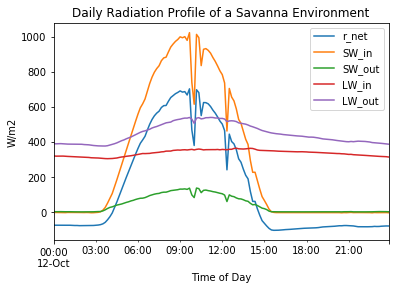

In [58]:
#plotted 12th of october, 2016
date = rad[rad.index.date == datetime.date(2016,10,12)]

# select only the values that need to be plotted
x = date[['r_net', 'SW_in', 'SW_out', 'LW_in', 'LW_out']]

# plot the date that was selected. 
x.plot()

#Add labels and a title
plt.title("Daily Radiation Profile of a Savanna Environment")
plt.xlabel('Time of Day')
plt.ylabel('W/m2')

Answer:
       incoming shortwave radiation is the largest component in the system. net radtino is at its highest during mid morning just after 9:00 and its lowest in the afternoon around 3:00 pm. 

# 3. Landscape energy budget 🏞️

<hr style="border-top: 0.5px solid gray; margin-top: 10pt; margin-bottom: 12pt"></hr>

As we saw above, the amount of energy available to the Earth's surface from radiation far exceeds the outgoing longwave radiation emitted by the surface, so there must be other processes cooling off the surface.  


Energy flows follow a gradient a high to low concentration. We can describe the flow of energy, $F_Q$, in some direction, $x$, in terms of this gradient ($\frac{dQ}{dx}$) and the **conductivity $(k_c)$** of the surface.

\begin{equation}
\tag{3.1}
    F_Q \ = \ - k_c \frac{dQ}{dx}
\end{equation}

This equation is known as **Fick's Law**, and the negative sign reflects the convention that energy flows from high to low. Thus, when the gradient is increasing (positive), flow is directed away (negative). Conductance refers to the ability of the substance or surface to transport energy.

At the surface of the Earth, there are three important transport-driven processes – **conduction**, **convection**, and **evaporation** – each of which is associated with an energy flux.


## 3.1. Ground Heat Flux

The transfer of energy between two materials in contact with one another is known as **conduction**. Conduction is driven by temperature gradients between the two surfaces. In the Earth system context, thermal conduction of heat into the soil is quantified by the **ground heat flux**, $G$. In most landscapes, very little energy is stored in the ground, so $G$ is often ignored in the landscape energy balance.

## 3.2. Sensible Heat Flux 🌡️

**Sensible heat flux**, $H$, refers to the loss of energy from the surface to the atmosphere via **convection**. Like conduction, convection is driven by differences in temperature, but this time between the *surface* and the *air*. That is,

\begin{equation}
\tag{3.2}
    H \ \propto \ T_s - T_a
\end{equation}

This proportionality between sensible heat flux and the temperature difference is determined by the properties of the surface and the turbulent flow across the surface:

\begin{equation}
\tag{3.2}
    H \ = \ k_H \rho_a c_p (T_s - T_a)
\end{equation}

where $k_H$ is the atmospheric conductivity, $\rho_a$ is the density of air, and $c_p$ is the specific heat capacity of air (at constant pressure). Heat capacity refers to the amount of energy required to change the temperature of a substance. Though $c_p$ varies slightly with air temperature, to simplify our calculations we will assume a constant value of $1004.67 \text{ J kg}^{-1} \text{ K}^{-1}$ for $c_p$.

The atmospheric conductivity depends on the roughness of the surface and the wind speed. While we cannot measure this quantity directly, we can use **eddy covariance** to calculate $H$. In the air, heat is transported by the turbulent flow of air in multiple layers. By averaging the product of the fluctuations of temperature and vertical wind, we can determine the amount of energy transported to or from the surface via the air – i.e. the sensible heat flux. Thus, our equation for $H$ becomes

\begin{equation}
\tag{3.3}
    H \ = \ \overline{\rho_{a}} \ c_p \ \overline{w'T'}
\end{equation}

The overbars in this equation represent averages taken over a period of time when the mean vertical flow is negligible (conventionally 30 minutes). This method relies on sensors to measure the fluctuations of temperature, wind, and gas concentrations at very high frequencies in order to adequately sample the eddies that are responsible for transport. The two sensors - an anemometer and a gas analyzer – must be a close together as possible to effectively sample the same pocket of air at the same time.

<img src="./assets/towersensors.jpeg" alt="sensors" width="600"/>

The gas analyzer provides a measurement of the concentration of water vapor in the air, which allows for calculation of air density over time. The average air density over any period of time can be expressed as the sum of the average density of dry air, $\overline{\rho_d}$, and the average vapor density, $\overline{\rho_v}$:

\begin{equation}
\tag{3.4}
    \overline{\rho_{a}} \ = \ \overline{\rho_{v}} + \overline{\rho_d}
\end{equation}

Because we know the concentration of water vapor in the air, we can determine the **atmospheric vapor pressure** (or partial pressure of water vapor in the air), $\overline{e_a}$. Using the ideal gas law, which relates the amount, pressure, and temperature of a gas, we can calculate vapor density:

\begin{equation}
\tag{3.5}
    \overline{\rho_v} \ = \ \frac{M_{_{\text{H}_2\text{O}}} \cdot \overline{e_a}}{R \ \overline{T_a}}
\end{equation}

where $M_{_{\text{H}_2\text{O}}}$ is the molar mass of water, $R$ is the ideal gas constant, and $\overline{T_a}$ is the average air temperature.

Similarly, we can compute the dry air density over the same time period using the partial pressure of dry air, which is simply the difference between total air pressure, $\overline{P_a}$, and the vapor pressure:

\begin{equation}
\tag{3.6}
    \overline{\rho_d} \ = \ \frac{M_{_{\text{air}}} \left( \overline{P_a} \ - \ \overline{e_a}\right)}{R \ \overline{T_a}}
\end{equation}

where $M_{_{\text{air}}}$ is the molar mass of dry air.

In [5]:
# not sure if I was suppose to write anything herer. 
#flux

#actually we'll go ahead and use this cell to convert t_Celsius to t_k
def convertK(T_a):
    T_K = T_a + 273.15

    return T_K
              # apply this equation to the T_a column in 'flux'
print(flux)

                          P_a    e_a       T_a  cov_Ts_Uz  cov_h2o_Uz
TIMESTAMP                                                            
2016-08-01 00:00:00  83.66614  1.278  15.16205  -0.024011    0.013023
2016-08-01 00:30:00  83.66602  1.268  14.96254  -0.006669    0.008141
2016-08-01 01:00:00  83.66491  1.285  14.89313  -0.008048    0.008641
2016-08-01 01:30:00  83.65948  1.307  14.44728  -0.003730    0.007857
2016-08-01 02:00:00  83.65968  1.237  14.54416   0.002495    0.003422
...                       ...    ...       ...        ...         ...
2019-12-31 21:30:00  83.79510  1.463  16.00043   0.000245   -0.000018
2019-12-31 22:00:00  83.78394  1.488  15.82906   0.004016    0.001352
2019-12-31 22:30:00  83.79444  1.451  14.92903   0.000014    0.000619
2019-12-31 23:00:00  83.78236  1.471  14.86763  -0.005701   -0.000977
2019-12-31 23:30:00  83.74983  1.463  14.76210   0.005533    0.002608

[14585 rows x 5 columns]


## 3.3. Latent Heat Flux 💧

**Latent heat flux**, $\lambda E$, is the energy flux associated with phase changes (**evaporation** and **condensation**) between water at the Earth's surface and water vapor in the air. $\lambda E$ is driven by gradients of *vapor pressure* between the surface ($e_s$) and the air ($e_a$):

\begin{equation}
\tag{3.7}
    \lambda E \ \propto \ e_s - \ e_a
\end{equation}

This relationship also depends on the density and total pressure of the air, the atmospheric conductivity to vapor transport, $k_E$, and the latent heat of vaporization of water, $\lambda_v$ (the energy required to convert one mole of H<sub>2</sub>O from liquid to gas at 100$^{\circ}$C):


\begin{equation}
\tag{3.8}
    \lambda E \ = \ k_E \lambda_v \rho_a \frac{M_{_{\text{air}}}}{M_{_{\text{H}_2\text{O}}}} \frac{e_s - e_a}{P_a}
\end{equation}

Like the sensible heat flux, it is difficult to measure $\lambda E$ directly, but we can calculate it using eddy covariance:

\begin{equation}
\tag{3.9}
    \lambda E \ = \ \overline{\rho_a} \lambda_v \overline{w' \chi_{v}'}
\end{equation}

where $\chi_v$ is the mole fraction of water vapor in the air.

While Equation 3.9 provides a rough approximation of latent heat flux, in practice, a number of corrections must be made to this equation to account for the separation of the sensors and the varying density of air due to both sensible and latent heat fluxes. These corrections have been implemented in a function (`lhf.py`) for ease of our computations. Thus, we can import the function and calculate $\lambda E$ as follows:

```python 
from lhf import lhf_wpl

lhf_wpl(df)
```

For now, we'll just import the function.

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [6]:
#import lhf
from lhf import lhf_wpl

<hr style="border-top: 0.5px solid gray; margin-top: 6pt; margin-bottom: 12pt"></hr>

## Problems

### 3.1. Density of air

Before calculating $H$, it's useful to calculate the vapor density and densities of dry and wet air.

<div class="practice">
    📚  <b> Question 3.1. </b> 
    Use equations 3.4, 3.5, and 3.6 to calculate $\rho_v$, $\rho_d$, and $\rho_a$. Hint: be sure to convert temperature to K and check your units!. To make your life easier later on, add $T$ in K and each of the densities to the original <span class="code">DataFrame</span> with the following names: <code>'T_K'</code>, <code>'rho_v'</code>, <code>'rho_d'</code>, and <code>'rho_a'</code>.
</div>

In [7]:
# calculate pv, pd, pa (convert to K and check units for conversions)
def convertK(T_a):
    T_K = T_a + 273.15

    return T_K

#flux.T_a.apply(convertK)

flux['T_K'] = flux.T_a + 273.15  #succsesfully created column that has temperature in K

flux['rho_v'] =  (18.01528 * flux['e_a']) / ( 8.314 * flux['T_K'])
flux['rho_d'] = (28.9647 * (flux['P_a'] - flux['e_a']) / (8.314 * flux['T_K']))
flux['rho_a'] = flux['rho_v'] + flux['rho_d']



   # vakues of rho_a, rho_v, rho_
flux

,P_a,e_a,T_a,cov_Ts_Uz,cov_h2o_Uz,T_K,rho_v,rho_d,rho_a
TIMESTAMP,,,,,,,,,
2016-08-01 00:00:00,83.66614,1.278,15.16205,-0.024011,0.013023,288.31205,0.009605,0.995545,1.005150
2016-08-01 00:30:00,83.66602,1.268,14.96254,-0.006669,0.008141,288.11254,0.009536,0.996354,1.005890
2016-08-01 01:00:00,83.66491,1.285,14.89313,-0.008048,0.008641,288.04313,0.009667,0.996375,1.006042
2016-08-01 01:30:00,83.65948,1.307,14.44728,-0.003730,0.007857,287.59728,0.009847,0.997587,1.007435
2016-08-01 02:00:00,83.65968,1.237,14.54416,0.002495,0.003422,287.69416,0.009317,0.998101,1.007418
...,...,...,...,...,...,...,...,...,...
2019-12-31 21:30:00,83.79510,1.463,16.00043,0.000245,-0.000018,289.15043,0.010964,0.991983,1.002947
2019-12-31 22:00:00,83.78394,1.488,15.82906,0.004016,0.001352,288.97906,0.011158,0.992136,1.003293
2019-12-31 22:30:00,83.79444,1.451,14.92903,0.000014,0.000619,288.07903,0.010914,0.995810,1.006724


### 3.2. Calculate $H$

Now that you've determined $\rho_a$, you can use this value to calculate sensible heat flux.

<div class="practice">
    📚  <b> Question 3.2. </b> 
    Use Equation 3.3 to determine sensible heat flux, $H$.
</div>

In [8]:
# 𝐻 = 𝜌𝑎 * 𝑐𝑝 * 𝑤′𝑇′     is the equation

flux['H'] = flux['rho_a'] * c_p * flux['cov_Ts_Uz']
flux

,P_a,e_a,T_a,cov_Ts_Uz,cov_h2o_Uz,T_K,rho_v,rho_d,rho_a,H
TIMESTAMP,,,,,,,,,,
2016-08-01 00:00:00,83.66614,1.278,15.16205,-0.024011,0.013023,288.31205,0.009605,0.995545,1.005150,-24.246873
2016-08-01 00:30:00,83.66602,1.268,14.96254,-0.006669,0.008141,288.11254,0.009536,0.996354,1.005890,-6.739836
2016-08-01 01:00:00,83.66491,1.285,14.89313,-0.008048,0.008641,288.04313,0.009667,0.996375,1.006042,-8.134547
2016-08-01 01:30:00,83.65948,1.307,14.44728,-0.003730,0.007857,287.59728,0.009847,0.997587,1.007435,-3.775342
2016-08-01 02:00:00,83.65968,1.237,14.54416,0.002495,0.003422,287.69416,0.009317,0.998101,1.007418,2.525041
...,...,...,...,...,...,...,...,...,...,...
2019-12-31 21:30:00,83.79510,1.463,16.00043,0.000245,-0.000018,289.15043,0.010964,0.991983,1.002947,0.247042
2019-12-31 22:00:00,83.78394,1.488,15.82906,0.004016,0.001352,288.97906,0.011158,0.992136,1.003293,4.047757
2019-12-31 22:30:00,83.79444,1.451,14.92903,0.000014,0.000619,288.07903,0.010914,0.995810,1.006724,0.014109


### 3.3. Latent heat flux

<div class="practice">
    📚  <b> Question 3.3. </b> 
    Use the <code>lhf_wpl</code> function to determine latent heat flux, $\lambda E$.
</div>

In [9]:
lmbE = lhf_wpl(flux, rho_v='rho_v',rho_d='rho_d',T_K='T_K',
           cov_h2o_Uz='cov_h2o_Uz',cov_Ts_Uz='cov_Ts_Uz')

flux['lmbE'] = lmbE


#flux.plot()
#plt.show
flux

,P_a,e_a,T_a,cov_Ts_Uz,cov_h2o_Uz,T_K,rho_v,rho_d,rho_a,H,lmbE
TIMESTAMP,,,,,,,,,,,
2016-08-01 00:00:00,83.66614,1.278,15.16205,-0.024011,0.013023,288.31205,0.009605,0.995545,1.005150,-24.246873,32.267734
2016-08-01 00:30:00,83.66602,1.268,14.96254,-0.006669,0.008141,288.11254,0.009536,0.996354,1.005890,-6.739836,20.170297
2016-08-01 01:00:00,83.66491,1.285,14.89313,-0.008048,0.008641,288.04313,0.009667,0.996375,1.006042,-8.134547,21.412381
2016-08-01 01:30:00,83.65948,1.307,14.44728,-0.003730,0.007857,287.59728,0.009847,0.997587,1.007435,-3.775342,19.475918
2016-08-01 02:00:00,83.65968,1.237,14.54416,0.002495,0.003422,287.69416,0.009317,0.998101,1.007418,2.525041,8.475598
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 21:30:00,83.79510,1.463,16.00043,0.000245,-0.000018,289.15043,0.010964,0.991983,1.002947,0.247042,-0.044388
2019-12-31 22:00:00,83.78394,1.488,15.82906,0.004016,0.001352,288.97906,0.011158,0.992136,1.003293,4.047757,3.358266
2019-12-31 22:30:00,83.79444,1.451,14.92903,0.000014,0.000619,288.07903,0.010914,0.995810,1.006724,0.014109,1.536737


### 3.4 Comparing turbulent fluxes

Now that you've calculated both sensible and latent heat, compare how the two vary. Consider the conditions under which $H$ and $\lambda E$ are positive or negative. What physical processes drive these fluctuations?

<div class="practice">
    📚  <b> Question 3.4. </b> 
    Plot sensible and latent heat for the last week of each year (beginning on December 25th). Be sure your plot(s) is/are appropriately scaled and labeled. How do they compare? When does $H$ exceed $\lambda E$? When does $\lambda E$ exceed $H$? Why do are the fluxes so different for the same week of 2016 and 2019 (Hint: there is one column of data you've been provided that you have not yet used.)?
</div>

Text(0, 0.5, 'K*m*S^-1')

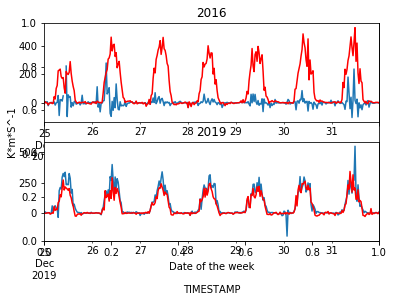

In [10]:
# plot H and lambdaE
# is the dataframe thats being manipulated
# Initialize empty figure
fig = plt.figure()
# Add two axes

# have one large subplot
ax = fig.add_subplot(111) 

# add the data to each of the two boxes. (last week of each year)
ax1 = fig.add_subplot(2,1,1)
flux.lmbE['2016-12-25':'2016-12-31'].plot(title = '2016')
flux.H['2016-12-25':'2016-12-31'].plot(color = 'red')

ax2 = fig.add_subplot(2,1,2)
flux.lmbE['2019-12-25':'2019-12-31'].plot(title = '2019')
flux.H['2019-12-25':'2019-12-31'].plot(color = 'red')

# set labels for both graphs
ax.set_xlabel('Date of the week')
ax.set_ylabel('K*m*S^-1')

In [55]:
# H exceeds lambda E during the evenings and night when energy lost due to convection 
#is greater than the energy changes through phases changes. The values appear different
# across the two seperate weeks becuase the eddy covarienace of the latenet heat flux values 
# are different for the two weeks sampled.

TIMESTAMP
2019-12-25 00:00:00   -0.981773
2019-12-25 00:30:00    9.280123
2019-12-25 01:00:00    1.905255
2019-12-25 01:30:00    2.981449
2019-12-25 02:00:00    1.127778
                         ...   
2019-12-31 21:30:00   -0.044388
2019-12-31 22:00:00    3.358266
2019-12-31 22:30:00    1.536737
2019-12-31 23:00:00   -2.425356
2019-12-31 23:30:00    6.475795
Name: lmbE, Length: 336, dtype: float64

# 4. Putting it all together

<hr style="border-top: 0.5px solid gray; margin-top: 10pt; margin-bottom: 12pt"></hr>

Now that you have all the terms in Equation 1.2 (with the exception of $G$, which we will assume is negligible), you can calculate the overall energy balance of the landscape:

\begin{equation}
\tag{4.1}
    \frac{dQ}{dt} \ = \ R_n \ - \ H \ - \ \lambda E
\end{equation}


In order to compare the radiation data to the flux data, you must first ensure that the two datasets have the same temporal resolution. You can do this in <span class="code">pandas</span> using `df.resample()`, which resamples the dataset over a defined interval. For our dataset, this looks like:

```python
rad30 = rad.resample(pd.tseries.offsets.Minute(30)).mean()
```

<div class="example">
    ✏️ <b> Try it. </b> 
    Copy and paste the code above to generate a new <span class="codeb">DataFrame</span> with half-hourly averages of the radiation data. (Note that this will also resample the precipitation data, which is not useful. You can choose to either ignore this column or remove it from the new <span class="codeb">DataFrame</span>.
</div>

In [17]:
rad30 = rad.resample(pd.tseries.offsets.Minute(30)).mean()

print(len(rad30))
print(len(flux))

print(rad30.head)
print(flux.head)    # checks out

59904
14585
<bound method NDFrame.head of                        DOY     SW_in    SW_out       LW_in      LW_out  P_mm  \
TIMESTAMP                                                                      
2016-08-01 00:00:00  214.0 -0.712000  1.421667  349.233333  386.000000   0.0   
2016-08-01 00:30:00  214.0 -1.419000  1.627000  334.933333  384.900000   0.0   
2016-08-01 01:00:00  214.0 -1.841000  1.836333  332.366667  382.933333   0.0   
2016-08-01 01:30:00  214.0 -1.021000  2.132667  328.633333  382.133333   0.0   
2016-08-01 02:00:00  214.0 -2.068667  1.617000  318.600000  379.833333   0.0   
...                    ...       ...       ...         ...         ...   ...   
2019-12-31 21:30:00  365.0 -1.931667  2.422667  323.833333  380.966667   0.0   
2019-12-31 22:00:00  365.0 -1.645667  1.962667  324.966667  382.166667   0.0   
2019-12-31 22:30:00  365.0 -1.009000  1.317000  342.500000  383.533333   0.0   
2019-12-31 23:00:00  365.0 -0.835333  1.351667  345.066667  385.033333   0.0  

### 4.1. Residual energy

Now that all the data are at the same frequency, calculate $\frac{dQ}{dt}$ using Equation 4.1.

<div class="practice">
    📚  <b> Question 4.1. </b> 
    Calculate the residual energy flux, $\frac{dQ}{dt}$, using Equation 4.1.
</div>

In [18]:
# calculated residual energy flux

# calculation for residual energy
res_E = rad30.r_net - flux.H - flux.lmbE
res_E

TIMESTAMP
2016-08-01 00:00:00   -46.921194
2016-08-01 00:30:00   -66.443127
2016-08-01 01:00:00   -67.521834
2016-08-01 01:30:00   -72.354243
2016-08-01 02:00:00   -75.919639
                         ...    
2019-12-31 21:30:00   -61.690321
2019-12-31 22:00:00   -68.214356
2019-12-31 22:30:00   -44.910179
2019-12-31 23:00:00   -33.962588
2019-12-31 23:30:00   -67.928165
Length: 59907, dtype: float64

### 4.2. Rainfall

<div class="practice">
    📚  <b> Question 4.2. </b> 
    Calculate daily rainfall amounts and use a bar graph to plot daily rainfall totals on two separate subplots. Which year was wetter? 
</div>

0.8666666666666667
128.96666666666667
(array([ 267,  703, 1085, 1086, 1088, 1090, 1091, 1094, 1099, 1856, 1865,
       1886, 2674, 4156, 4636, 4637, 4640, 4660, 5094, 5197, 5362, 5455,
       5493, 5545, 5584, 5631]),)


[]

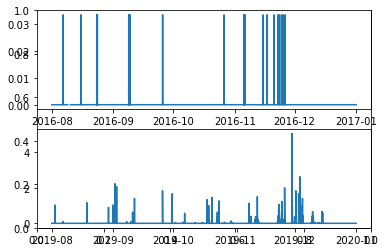

In [22]:
# calcualte daily rainfall amounts 
y2016 =  rad30.index.year == 2016
y2019 =  rad30.index.year == 2019 # create boolean masks. 

# check that there are values in each year.
print(rad30[y2016].P_mm.sum())
print(rad30[y2019].P_mm.sum())

# create objects used to be plotted
p16 = rad30[y2016].P_mm
p19 = rad30[y2019].P_mm

#groupby date
dp19 = p19.groupby(p19.index.date)
dp16 = p16.groupby(p16.index.date)

#find indexes of when it rained!
rain = p16 > 0.0001
b = np.where(rain)
print(b)

#initialize figure
fig = plt.figure()
ax = fig.add_subplot(111)

# Add two axes
ax1 = fig.add_subplot(2,1,1)
ax1.plot(p16)             
ax1.plot(kind='bar')
ax2 = fig.add_subplot(2,1,2)
ax2.plot(p19)
ax2.plot(kind='bar')


### 4.3. Diurnal radiation, sensible heat flux, and latent heat flux

Examine the figure you generated in 4.2 (and any of the raw data you choose – temperature, pressure, etc.). Pick an interesting day and compare the diurnal variation in net radiation, sensible and latent heat flux, and the residual energy.

<div class="practice">
    📚  <b> Question 4.3. </b> 
    Plot $H$, $\lambda E$, $R_n$, and the net total energy flux (i.e. the quantity you calculated in Question 4.1) across a single day in 2016 and 2019. In which year is the system closer to steady state? Discuss the differences between the two and speculate what is driving these variations.
</div>

No handles with labels found to put in legend.


Text(0, 0.5, 'fluxes ')

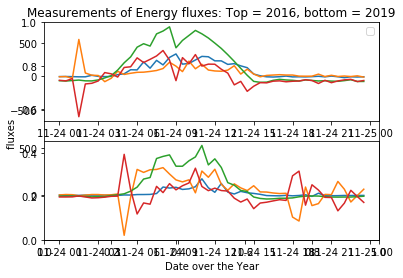

In [51]:
#select only the things to be plotted from both flux and rad30
rad_rnet = rad30[['r_net']]
fluxybois = flux[['H', 'lmbE']]

# select the dates to be used. 
daterad1 = rad_rnet[rad_rnet.index.date == datetime.date(2016,11,24)]
dateflux1 = fluxybois[fluxybois.index.date == datetime.date(2016, 11, 24)]

daterad = rad_rnet[rad_rnet.index.date == datetime.date(2019,11,24)]
dateflux = fluxybois[fluxybois.index.date == datetime.date(2019, 11, 24)]

# res_E selection to be plotted
dateE1 = res_E['2016-11-24']
dateE2 = res_E['2019-11-24']


fig = plt.figure()
ax = fig.add_subplot(111)

# Add two axes
ax1 = fig.add_subplot(2,1,1)
ax1.plot(dateflux1,)             
ax1.plot(daterad1)
ax1.plot(dateE1)
plt.legend()
ax2 = fig.add_subplot(2,1,2)
ax2.plot(dateflux)
ax2.plot(daterad)
ax2.plot(dateE2)

#vis metadata
ax.set_title("Measurements of Energy fluxes: Top = 2016, bottom = 2019")
ax.set_xlabel('Date over the Year')
ax.set_ylabel('fluxes ')

### Answer:
           The sytem more closely approximates steady state during the same day in 2019 than it does in 2016. This could be becuase there is greater rcorded precipitaion on this day then there was on the same day in 2016. The precipitation seems to have set the system into a steady state. The increased cloud cover reduces the energy fluxes compared to the day where there was greater rain. Ina ddtiotni, the data from 2016 seems to be from a drought year which could have unbalanced energy fluxes.

### 4.4. Average residual energy

Calculate the average residual energy, $\frac{dQ}{dt}$, for each year.

<div class="practice">
    📚  <b> Question 4.4. </b> 
    Calculate the average residual energy, $\frac{dQ}{dt}$, for each year.
</div>

In [63]:
#averaging residual enegy by year. 
res_E16 = res_E['2016'].mean()
res_E19 = res_E['2019'].mean()

print(res_E16)
print(res_E19)

17.884696611674062
16.599656220153545


### 4.5. Energy balance closure.

In addition to the sensors on the flux tower, the field site in Kenya is also equipped with soil heat flux plates that measure (you guessed it) the soil (or ground) heat flux, $G$. Import the soil heat flux data in the cell below (the file has a single column of values of $G$ in W m<sup>-2</sup>).

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [57]:
shf = pd.read_csv('../data/lab_2/CR3000_SN9945_Table1_ed.csv',header=0,names=['G'],index_col=0,parse_dates=True)

<div class="practice">
    📚  <b> Question 4.5. </b> 
    Re-calculate the average annual residual energy (i.e. repeat Questions 4.1 and 4.4) using the soil heat flux data and Equation 1.1. Was our previous assumption of negligible soil heat flux valid? If so, suggest a possible explanation for the discrepancy between $R_n$ and $H + \lambda E$. Otherwise, state why you think including $G$ made a difference.
</div>

In [62]:
res_EG = rad30.r_net - flux.H - flux.lmbE - shf.G
res_EG16 = res_EG['2016'].mean()
res_EG19 = res_EG['2019'].mean()

#Without ground
print(res_E16)
print(res_E19)

#with gournd
print(res_EG16)
print(res_EG19)

# I Do not believe that the initial assumption of negligible soil heat flux was valid becuase 
# factoring in the soil heat flux to each year increased the spread between the two values. 
# if the values were to change together, I would have accepted the null hypotheis that the extra 
# parameter did mnot ake an important difference but since the two means increase in range from one 
# another this means that the soil is a vlaue that is shifting with the temperaature fluxes/
# my explanatino for why the soil energy value changes the overally means if becuase the precific heat 
# capacity of the soils is different form the air which mean the land realeases heat energy after the air 
# has lost its own during cooling cycles. 

14.28338002757307
19.126995380704194


<hr style="border-top: 1px solid gray; margin-top: 24px; margin-bottom: 1px"></hr>

In [1]:
# IGNORE THIS CELL
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/exercises.css", "r").read()
    return HTML(styles)
css_styling()